[*********************100%%**********************]  1 of 1 completed


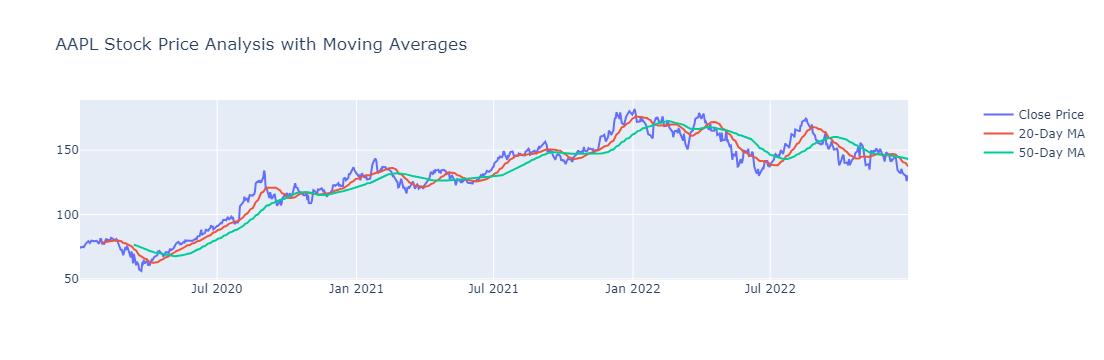

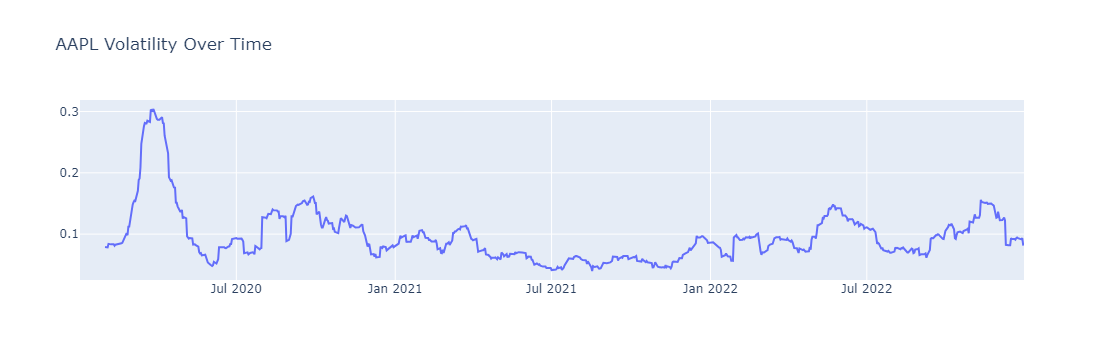

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Download historical stock data
ticker = 'AAPL'  # Example: Apple Inc.
stock_data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Calculate moving averages
stock_data['MA20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['MA50'] = stock_data['Close'].rolling(window=50).mean()

# Calculate volatility
stock_data['Returns'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Returns'].rolling(window=20).std() * np.sqrt(20)

# Plot stock performance with moving averages
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], name='Close Price'), secondary_y=False)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA20'], name='20-Day MA'), secondary_y=False)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MA50'], name='50-Day MA'), secondary_y=False)

fig.update_layout(title=f'{ticker} Stock Price Analysis with Moving Averages')
fig.show()

# Plot volatility
fig = go.Figure()

fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Volatility'], name='Volatility'))

fig.update_layout(title=f'{ticker} Volatility Over Time')
fig.show()
